<a href="https://colab.research.google.com/github/Stephen-Edusei/Module-B-semester-2/blob/main/OMDS_ModB2_Week2_Edusei_Stephen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who

The primary audience would be lending managers and risk analysts at a financial institution who make decisions about approving or pricing loans. A secondary audience could include executive leadership interested in overall portfolio risk exposure.

What

The key message is that certain borrower characteristics (such as income level, employment length, and loan amount) are strongly associated with default risk. The goal of the visualization would be to clearly highlight differences between default and non-default groups to support better underwriting decisions.

How

I would use simple, focused visualizations that remove clutter and emphasize comparison. For example, a bar chart comparing default rates across income categories or a scatterplot showing income vs. loan amount with default cases highlighted in a contrasting color. I would apply clean labeling, reduce unnecessary gridlines, and use color intentionally to direct attention to the key insight—following the principles in Storytelling With Data of decluttering and guiding the viewer’s eye.

# 3. Homework - work with your own data

In [59]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [60]:


# Load dataset
df_credit = pd.read_csv("credit_risk_dataset.csv")


In [61]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [62]:
df_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [63]:
df_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [64]:
#Duplicate Rows

duplicate_rows = df_credit.duplicated().sum()
print("Duplicate rows:", duplicate_rows)

df_clean = df_credit.drop_duplicates()


Duplicate rows: 165


In [65]:
#Duplicate Values

print("Duplicate Ages:", df_clean['person_age'].duplicated().sum())


Duplicate Ages: 32358


In [66]:

#Mean, Median, Mode

for col in df_credit.select_dtypes(include=np.number).columns:
    print(f"\nColumn: {col}")
    print("Mean:", df_clean[col].mean())
    print("Median:", df_clean[col].median())
    print("Mode:", df_clean[col].mode()[0])



Column: person_age
Mean: 27.74700765054294
Median: 26.0
Mode: 23

Column: person_income
Mean: 66091.64082551826
Median: 55000.0
Mode: 60000

Column: person_emp_length
Mean: 4.7905103238288556
Median: 4.0
Mode: 0.0

Column: loan_amnt
Mean: 9593.845631786771
Median: 8000.0
Mode: 10000

Column: loan_int_rate
Mean: 11.017265100098905
Median: 10.99
Mode: 7.51

Column: loan_status
Mean: 0.21868830207305034
Median: 0.0
Mode: 0

Column: loan_percent_income
Mean: 0.1702498766041461
Median: 0.15
Mode: 0.1

Column: cb_person_cred_hist_length
Mean: 5.811296890424482
Median: 4.0
Mode: 2


In [67]:
#Missing/Null Values

print(df_clean.isnull().sum())


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [68]:
#Fill Missing person_emp_length with Mean

df_clean.loc[:, 'person_emp_length'] = df_clean['person_emp_length'].fillna(
    df_clean['person_emp_length'].mean()
)

df_clean.loc[:, 'person_emp_length']

,person_emp_length
0,123.0
1,5.0
2,1.0
3,4.0
4,8.0
...,...
32576,1.0
32577,4.0
32578,3.0
32579,5.0


In [69]:
#Fill Missing loan_int_rate with Mean

df_clean.loc[:, 'loan_int_rate'] = df_clean['loan_int_rate'].fillna(
    df_clean['loan_int_rate'].mean()
)

df_clean.loc[:, 'loan_int_rate']

,loan_int_rate
0,16.02
1,11.14
2,12.87
3,15.23
4,14.27
...,...
32576,13.16
32577,7.49
32578,10.99
32579,11.48


In [70]:
#Check for Inconsistent Data

# Negative ages?
print(df_clean[df_clean['person_age'] < 0])

# Income zero or negative?
print(df_clean[df_clean['person_income'] <= 0])

# Loan amount greater than income?
print(df_clean[df_clean['loan_amnt'] > df_clean['person_income']])


Empty DataFrame
Columns: [person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []
Empty DataFrame
Columns: [person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []
Empty DataFrame
Columns: [person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []


In [71]:
#Encode Categorical Variables

df_encoded = pd.get_dummies(df_clean, drop_first=True)

df_encoded

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,False,...,False,True,False,True,False,False,False,False,False,False


In [72]:
#Check for Class Imbalance

print(df_clean['loan_status'].value_counts())
print(df_clean['loan_status'].value_counts(normalize=True))


loan_status
0    25327
1     7089
Name: count, dtype: int64
loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64


Conclusions

The dataset is suitable for modeling after standard preprocessing steps, including imputation of missing values, duplicate verification, categorical encoding, and validation of inconsistent entries. No critical structural deficiencies were identified, and the features are appropriate for credit risk analysis.

However, the target variable exhibits class imbalance, with a substantially higher proportion of non-default observations compared to default cases. This imbalance may bias predictive models toward the majority class and should be addressed using techniques such as class weighting, oversampling (e.g., SMOTE), or stratified cross-validation to ensure robust model performance.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

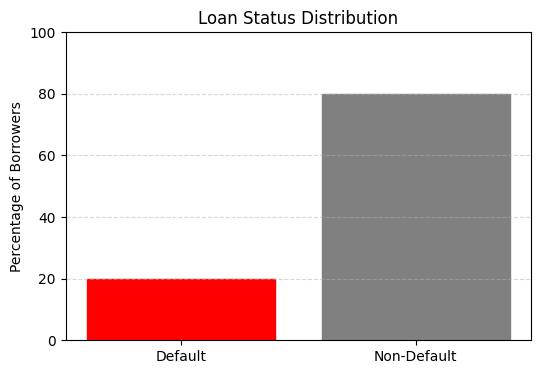

In [73]:
import matplotlib.pyplot as plt

# Example data (rough shape only)
categories = ['Default', 'Non-Default']
values = [20, 80]  # Example proportions

plt.figure(figsize=(6,4))

bars = plt.bar(categories, values)

# Highlight one category
bars[0].set_color('red')
bars[1].set_color('gray')

plt.title('Loan Status Distribution')
plt.ylabel('Percentage of Borrowers')
plt.ylim(0,100)

# Remove unnecessary chart junk
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()
